# Project Description
## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active * member in the sense, using bank products regularly, making transactions, etc )
* Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
    * 0=No ( Customer did not leave the bank )

    * 1=Yes ( Customer left the bank )

## Importing the necessary libraries and data

In [1]:
# Importing the main libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
# To tune different models
from sklearn.model_selection import GridSearchCV
# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# importing Keras Classifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# importing randomized Search
from sklearn.model_selection import RandomizedSearchCV
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the training dataset "bankchurn.csv"
df = pd.read_csv(
    r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\AI DEEP LEARNNG\bankchurn.csv"
)

In [3]:
# Visualizing the first 10 rows of the training dataset
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# Visualizing the last 10 rows of the training dataset validating the columns 
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# Creating a random sample from the training dataset to visualize it
df.sample(n=10, random_state=6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
739,740,15705639,Onyemauchechukwu,692,France,Female,28,8,95059.02,2,1,0,44420.18,0
9426,9427,15675518,Charlton,499,Spain,Female,53,1,75225.53,2,0,0,144849.10,1
8200,8201,15577359,Bezrukov,767,Spain,Male,47,5,0.00,1,1,0,121964.46,1
5880,5881,15718231,Gregory,537,France,Male,28,0,88963.31,2,1,1,189839.93,0
9114,9115,15605737,George,541,France,Male,36,5,0.00,2,1,0,124795.84,0
1060,1061,15650933,Ma,490,Spain,Female,48,8,155413.06,1,1,0,187921.30,0
1841,1842,15788539,Foxall,501,France,Female,34,3,107747.57,1,1,0,9249.36,0
5105,5106,15718465,Sadler,671,Germany,Male,51,3,96891.46,1,1,0,176403.33,1
2109,2110,15589224,Moore,596,Spain,Male,41,5,0.00,2,0,1,141053.85,0
4597,4598,15677105,Rossi,706,Germany,Female,46,4,105214.58,1,1,0,108699.59,1


In [6]:
# Visualizing the dimension of the training dataset 
df.shape

(10000, 14)

In [7]:
# Checking the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Converting the data from 'object' to 'category' type
df["Geography"] = df["Geography"].astype("category")
df["Gender"] = df["Gender"].astype("category")

In [9]:
# Validating the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(9), object(1)
memory usage: 957.4+ KB


In [10]:
# Checking for duplicate values in the training dataset
df.duplicated().value_counts()

False    10000
dtype: int64

In [11]:
# Checking for missing values in the training dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# Checking the weight of the classes to predict within the dataset
df["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

#### Observations:
* Having this approach and obtaining information about the dataset give us an idea about the strategy to identify and handle the missing values or any other issue within the dataset.
* The dataset has 14 columns and 10000 rows.
* There are a total of 10000 non-null observations in all the columns so we have not missing values.
* The columns of the dataset are as follow: "RowNumber", "CustomerId ", "Surname", "CreditScore ", "Geography", "Gender", "Age", "Tenure ", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited".
* The dataset contains 14 columns: 3 are object type('Surname, 'Geography', 'Gender', 9 corresponds to an integer64 type ('RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited').
* The total memory usage is approximately 1.1+ MB before changing the object type to category type, which is low. Although, after the changes the memory usage was reduced to 957.4+ KB. Surname's column was not transformed beacuse it is going to removed later on.
* We do not have duplicated values in our dataset.
* We do not have null values in our dataset
* Having a look on the first 10 rows of the dataset, the last 10, and extracting a 20 rows random sample, we can see that there is not relevant issues to report or treat.
* The class associated to the customers who did not leave the bank(0) represents the 79.63% while the class representing the clients leaving the bank(1) represents the 20.37%.

In [13]:
# Changing the scientific notation format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [14]:
# Checking the statistical summary for the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


#### Observations:
* Lets have a look on the statistical values of the variables regardless RowNumber, CustomerId.
  * CreditScore: the mean is 650.53 points, the used scores are between 350 and 850 points in this dataset with a standard deviation of 96.65. The 75% of the data is over 584 meanwhile the 25% of the data is over 718 points of score. 
  * Age: the mean is 38.92 years, the age is between 18 and 92 years in this dataset with a standard deviation of 10.49 years. The 75% of the data is over 32 meanwhile the 25% of the data is over 44.
  * Tenure: the mean is 5.1, the values are between 0 and 10 in this dataset with a standard deviation of 2.89 years. The 75% of the data is over 3 meanwhile the 25% of the data is over 7. 
  * Balance: the mean is 76485.89, the  values are between 0 and 250898.09 in this dataset with a standard deviation of 62397.41. The 75% of the data is over 0 meanwhile the 25% of the data is over 127644.24.
  * NumOfProducts: the mean is 1.53, the values are between 1 and 4 in this dataset with a standard deviation of 0.58. The 75% of the data is over 1 megapixels meanwhile the 25% of the data is over 2.
  * EstimatedSalary: the mean is 100090.24, the values are between 11.58 and 199992.48 in this dataset with a standard deviation of 57510.49. The 75% of the data is over 51002.11 meanwhile the 25% of the data is over 149388.25.

In [15]:
# Lets check the number of unique values per columns
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [16]:
# Printing the unique values per category type columns
for i in df.describe(include=["category"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


#### Observations:
* The dataset contains 50.14% samples or records of clients from France.
* The 25.09% of the records belongs to clients from Germany. 
* The 24.77% of the records are represented by clients from Spain.

In [17]:
# Printing the unique values per numerical type columns
for i in df.describe(include=["int64"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in RowNumber are :
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
**************************************************
Unique values in CustomerId are :
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
**************************************************
Unique values in CreditScore are :
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
**************************************************
Unique values in Age are :
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
****************************************

In [18]:
# Checking the Number of products = 1 versus the weight within the dataset per country
print(df[(df["NumOfProducts"] == 1) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["NumOfProducts"] == 1) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["NumOfProducts"] == 1) & (df["Geography"] == 'Spain')].value_counts().sum())

1349
2514
1221


In [19]:
# Checking the Number of products = 2 versus the weight within the dataset per country
print(df[(df["NumOfProducts"] == 2) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["NumOfProducts"] == 2) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["NumOfProducts"] == 2) & (df["Geography"] == 'Spain')].value_counts().sum())

1040
2367
1183


#### Observations:
* The general percentage of clients with at least 1 product represents the 50.84% of the dataset.
* The general percentage of clients with 2 products represents the 45.90% of the dataset.
* The general percentage of clients with 3 products represents the 2.66% of the dataset.
* The general percentage of clients with 4 products represents the 0.6% of the dataset.
* From 5084 records with 1 product 1349 belong to clients from Germany representing the 26.53%. 
* From 5084 records with 1 product 2514 belong to clients from France representing the 49.44%.
* From 5084 records with 1 product 1221 belong to clients from Spain representing the 24.01%.
* From 4590 records with 2 product 1040 belong to clients from Germany representing the 22.65%. 
* From 4590 records with 2 product 2367 belong to clients from France representing the 51.56%.
* From 4590 records with 2 product 1721 belong to clients from Spain representing the 37.49%.

In [20]:
# Checking HasCrCard = 1 condition versus the weight within the dataset per country
print(df[(df["HasCrCard"] == 1) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["HasCrCard"] == 1) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["HasCrCard"] == 1) & (df["Geography"] == 'Spain')].value_counts().sum())
print(df[(df["HasCrCard"] == 0) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["HasCrCard"] == 0) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["HasCrCard"] == 0) & (df["Geography"] == 'Spain')].value_counts().sum())

1791
3543
1721
718
1471
756


#### Observations:
* The 70.55% of the clients of the dataset have a credit card while 29.45% have not.
* From 7055 records with a credit card 1791 belongs to the customers from Germany, representing the 25.38%. 
* From 7055 records with a credit card 3543 belongs to the customers from France, representing the 50.21%.
* From 7055 records with a credit card 1721 belongs to the customers from Spain, representing the 24.39%.
* From 2945 records with NO credit card 718 belongs to the customers from Germany, representing the 24.38%. 
* From 2945 records with NO credit card 1471 belongs to the customers from France, representing the 49.94%.
* From 2945 records with NO credit card 756 belongs to the customers from Spain, representing the 25.67%.

In [21]:
# Validating how many customers leaving wit a credit card
print(df[(df["Exited"] == 1) & (df["HasCrCard"] == 1)].value_counts().sum())
print(df[(df["Exited"] == 1) & (df["HasCrCard"] == 0)].value_counts().sum())
print(df[(df["Exited"] == 0) & (df["HasCrCard"] == 1)].value_counts().sum())
print(df[(df["Exited"] == 0) & (df["HasCrCard"] == 0)].value_counts().sum())

1424
613
5631
2332


#### Observations:
* The 20.37% of the customers in the dataset left the bank before the 6 months.
* From 2037 records with clients leaving the bank 1424 belong to the customers with a credit card, representing the 69.90%. 
* From 2037 records with clients leaving the bank just 613 belong to the customers with NO credit card, representing the 30.09%.
* From 7963 records with clients NOT leaving the bank 5631 belong to the customers with a credit card, representing the 70.71%. 
* From 7963 records with clients NOT leaving the bank 2332 belong to the customers with NO credit card, representing the 29.29%.

In [22]:
print(df[(df["Exited"] == 1) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["Exited"] == 1) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["Exited"] == 1) & (df["Geography"] == 'Spain')].value_counts().sum())
print(df[(df["Exited"] == 0) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["Exited"] == 0) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["Exited"] == 0) & (df["Geography"] == 'Spain')].value_counts().sum())

814
810
413
1695
4204
2064


#### Observations:
* From 2037 records with clients leaving the bank 814 belong to the customers from Germany, representing the 39.96%. 
* From 2037 records with clients leaving the bank 810 belong to the customers from France, representing the 39.76%.
* From 2037 records with clients leaving the bank 413 belong to the customers from Spain, representing the 20.27%.
* From 7963 records with clients NOT leaving the bank 1695 belong to the customers from Germany, representing the 21.28%. 
* From 7963 records with clients NOT leaving the bank 4204 belong to the customers from France, representing the 52.79%.
* From 7963 records with clients NOT leaving the bank 2064 belong to the customers from Spain, representing the 25.91%.

## **EDA**

### Univariate Analysis

In [23]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="gist_ncar",
        order=data[feature].value_counts().index[:n].sort_values(ascending=True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=16,
            xytext=(1, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### CreditScore

In [25]:
# Checking the data types 
df.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

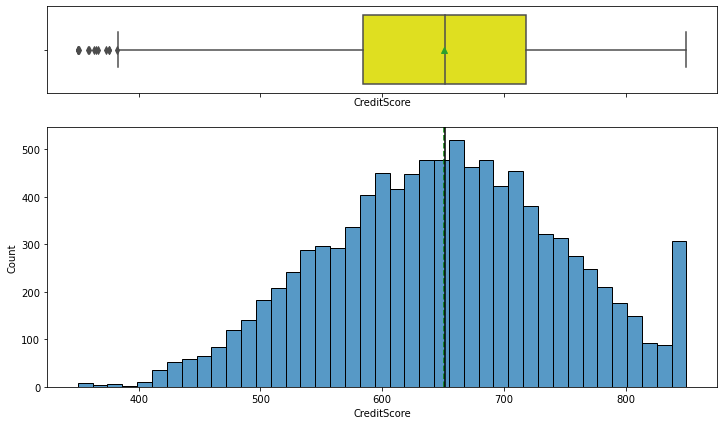

In [26]:
# Creating the histogram boxplot for the "CreditScore" variable
histogram_boxplot(df, "CreditScore")

In [27]:
# Validating the mean and meadian
print(round(df["CreditScore"].mean(), 2))
print(round(df["CreditScore"].median(), 2))

650.53
652.0


#### Observations:
* The mean is 653.53 score points , median 652, min 350 and max 850, Std 96.65. 1st quantile 584 and 3rd quantile 718. 
* The distribution tend to be normal in general with an anomaly to the right side of the curve.
* We can observe some outliers where the score is under the lower whisker, approximately around 380 credit score points.

### Age

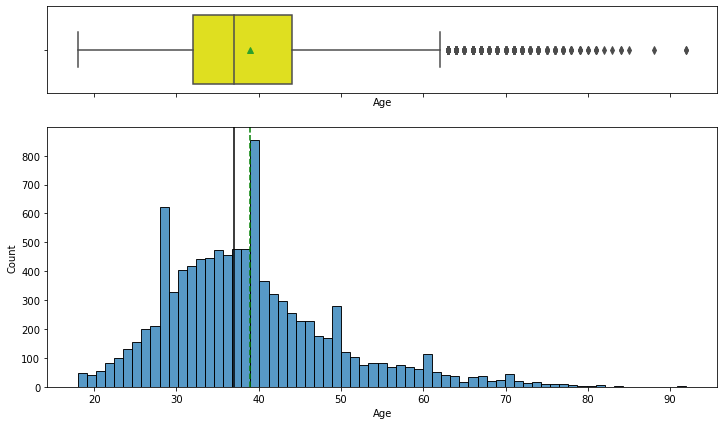

In [28]:
# Creating the histogram boxplot for the "Age" variable
histogram_boxplot(df, "Age")

In [29]:
# Validating the mean, median and mode
print(round(df["Age"].mean(), 2))
print(round(df["Age"].median(), 2))
print(round(df["Age"].mode(), 2))

38.92
37.0
0    37
dtype: int64


#### Observations:
* The mean is 38.92 years , median 37,  min 18 and max 92, Std 10.49. 1st quantile 32 and 3rd quantile 44. 
* We can observe a positive(+) or right skewness so quickly we can infer that "mean > median > mode" as the previous result show. The kurtosis seems to be normal or Mesokurtic.
* We can observe some outliers where the age is greater than the upper whisker approximately around 60.

### Tenure

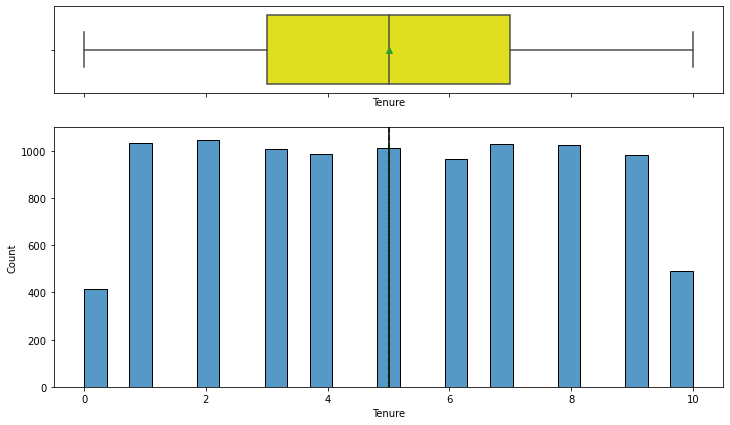

In [30]:
# Creating the histogram boxplot for the "Tenure" variable
histogram_boxplot(df, "Tenure")

In [31]:
# Validating the mean, median and mode
print(round(df["Tenure"].mean(), 2))
print(round(df["Tenure"].median(), 2))
print(round(df["Tenure"].mode(), 2))

5.01
5.0
0    2
dtype: int64


#### Observations:
* We observe a uniform distribution with discrete values 
* The mean is 5, median 5, mode 2, min 0 and max 10. 1st quantile 3 and 3rd quantile 7. 
* No outliers are observe.

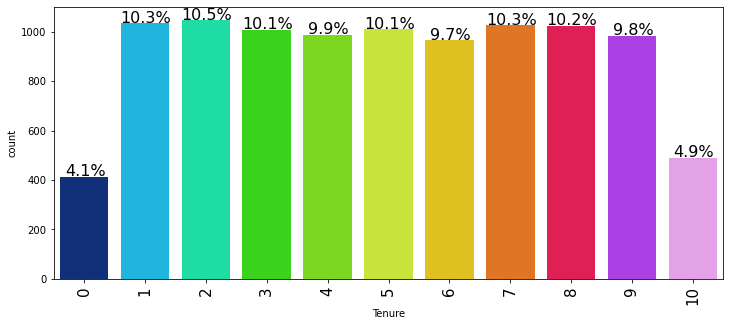

In [32]:
# Plotting a labeled barplot for the Tenure variable to validate the uniform distribution
labeled_barplot(df, "Tenure", perc=True)

### Balance

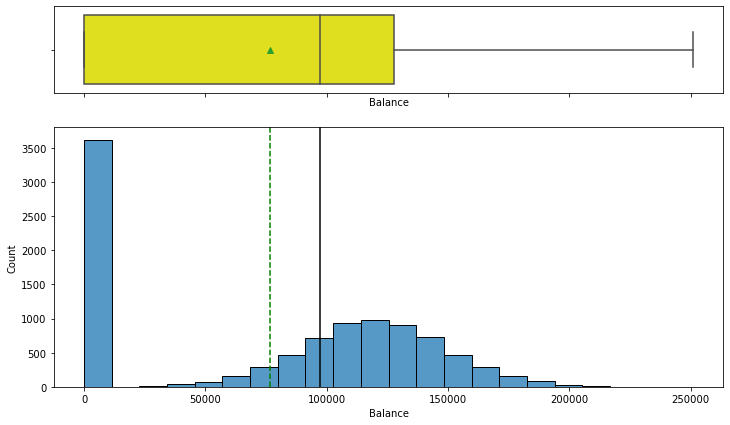

In [33]:
# Creating the histogram boxplot for the "Balance" variable
histogram_boxplot(df, "Balance")

In [34]:
# Validating the mean, median and mode
print(round(df["Balance"].mean(), 2))
print(round(df["Balance"].median(), 2))
print(round(df["Balance"].mode(), 2))

76485.89
97198.54
0   0.00
dtype: float64


In [35]:
# Checking the zero balance accounts per country
print(df[(df["Balance"] == 0) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["Balance"] == 0) & (df["Geography"] == 'Spain')].value_counts().sum())
print(df[(df["Balance"] == 0) & (df["Geography"] == 'Germany')].value_counts().sum())

2418
1199
0


#### Observations:
* The mode is zero but it seems an anomalous phenomenon that requires further analysis since we have 3617 out 10000 accounts with zero balance.
* The mean is 76485.89 , median 97198.54,  min 0 and max 250898.09, Std 62397.41. 1st quantile 0 and 3rdquantile 127644.24. 
* We can say that the distribution is predominantly normal despite the anomaly on the side of the curve. The kurtosis seems to be (-) negative or Platykurtic.
* No outliers are observed.

### NumOfProducts

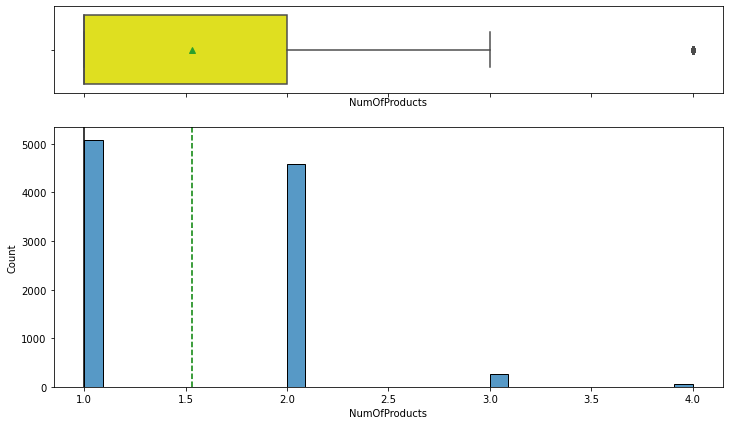

In [36]:
# Creating the histogram boxplot for the "NumOfProducts" variable
histogram_boxplot(df, "NumOfProducts")

In [37]:
# Validating to conceptualize the graph through the number of records per product
print(df[df["NumOfProducts"] == 1].value_counts().sum())
print(df[df["NumOfProducts"] == 2].value_counts().sum())
print(df[df["NumOfProducts"] == 3].value_counts().sum())
print(df[df["NumOfProducts"] == 4].value_counts().sum())

5084
4590
266
60


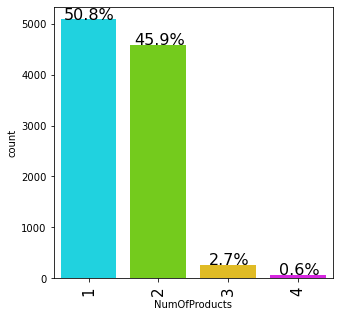

In [38]:
# Creating the labeled barplot for the "NumOfProducts" variable to validate percentage weight per number of product
labeled_barplot(df, "NumOfProducts", perc=True)

#### Observations:
* We have discrete values between 0 and 4.
* 5084 records has at least 1 produc(50.84%).
* 4590 recods have 2 products(45.90%).
* 266 records have 3 products(2.66%).
* 60 records have 4 products(0.6%).

### HasCrCard

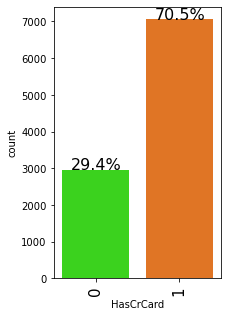

In [39]:
# Creating the labeled barplot for the "HasCrCard" variable to validate percentage weight per number of product
labeled_barplot(df, "HasCrCard", perc=True)

In [40]:
# Validating the number of customers with credit/no credit card.
print(df[df["HasCrCard"] == 0].value_counts().sum())
print(df[df["HasCrCard"] == 1].value_counts().sum())

2945
7055


#### Observations:
* The 70.55% of the clients of the dataset have a credit card while 29.45% have not.
* From 7055 records with a credit card 1791 belongs to the customers from Germany, representing the 25.38%. 
* From 7055 records with a credit card 3543 belongs to the customers from France, representing the 50.21%.
* From 7055 records with a credit card 1721 belongs to the customers from Spain, representing the 24.39%.
* From 2945 records with NO credit card 718 belongs to the customers from Germany, representing the 24.38%. 
* From 2945 records with NO credit card 1471 belongs to the customers from France, representing the 49.94%.
* From 2945 records with NO credit card 756 belongs to the customers from Spain, representing the 25.67%.

### EstimatedSalary

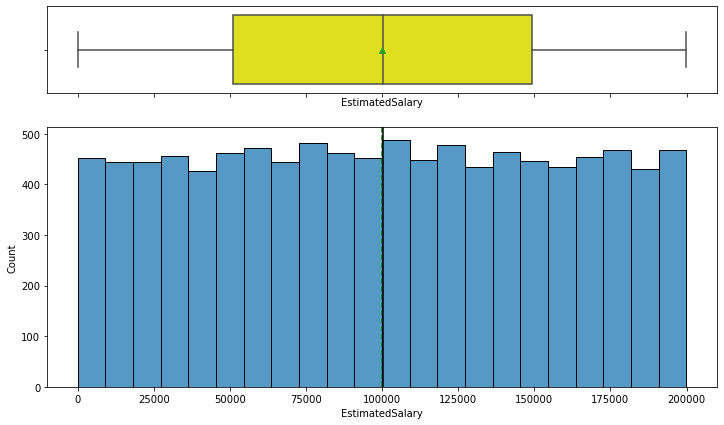

In [41]:
# Creating the histogram boxplot for the "EstimatedSalary" variable
histogram_boxplot(df, "EstimatedSalary")

In [42]:
# Validating the mean, median and mode
print(round(df["EstimatedSalary"].mean(), 2))
print(round(df["EstimatedSalary"].median(), 2))
print(round(df["EstimatedSalary"].mode(), 2))

100090.24
100193.91
0   24924.92
dtype: float64


#### Observations:
* We can observe a uniform distribution. 
* The mean is 100090.24, median 100193.91, mode 24924.92, min 11.58 and max 199992.48. 1st quantile 51002.11 and 3rd quantile 149388.25. 
* No outliers are observed.

### Exited

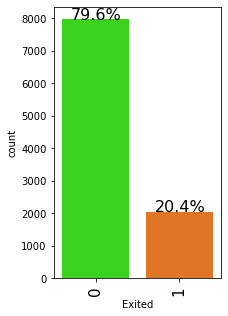

In [43]:
# Creating the labeled barplot for the "Exited" variable to validate percentage weight per number of product
labeled_barplot(df, "Exited", perc=True)

0    7963
1    2037
Name: Exited, dtype: int64


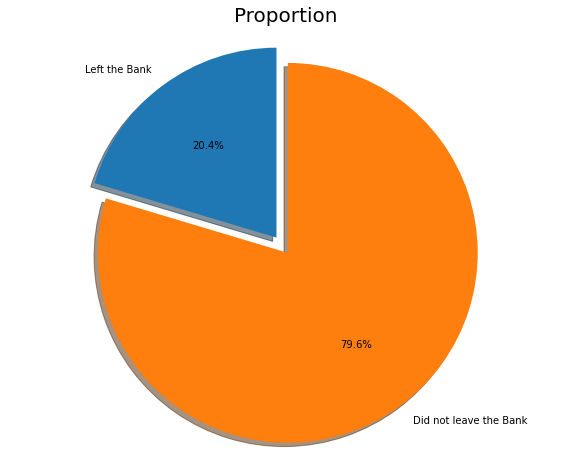

In [44]:
# Taken and adapted from the project "Data Scientist Employee Attrition"
print(df.Exited.value_counts())
labels = 'Left the Bank', 'Did not leave the Bank'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

#### Observations:
* 7963 Customers did not leave the Bank.
* 2037 Customers left the Bank.
* From 2037 records with clients leaving the bank 814 belong to the customers from Germany, representing the 39.96%. 
* From 2037 records with clients leaving the bank 810 belong to the customers from France, representing the 39.76%.
* From 2037 records with clients leaving the bank 413 belong to the customers from Spain, representing the 20.27%.
* From 2037 records with clients leaving the bank 814 belong to the customers from Germany, representing the 39.96%. 
* From 2037 records with clients leaving the bank 810 belong to the customers from France, representing the 39.76%.
* From 2037 records with clients leaving the bank 413 belong to the customers from Spain, representing the 20.27%.
* From 7963 records with clients NOT leaving the bank 1695 belong to the customers from Germany, representing the 21.28%. 
* From 7963 records with clients NOT leaving the bank 4204 belong to the customers from France, representing the 52.79%.
* From 7963 records with clients NOT leaving the bank 2064 belong to the customers from Spain, representing the 25.91%.

## Bivariate Analysis

In [45]:
# Function to plot distributions graphs
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [46]:
# Functions to plot the boxplots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

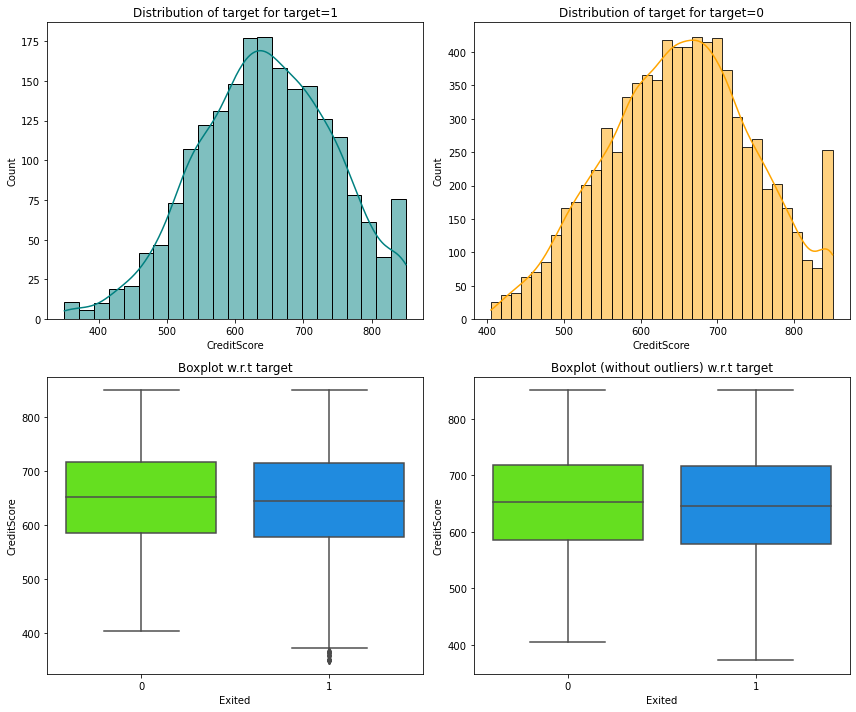

In [47]:
# Plotting the distribution and boxplots to correlate the variables CreditScore vs Exited
distribution_plot_wrt_target(df, "CreditScore", "Exited")

#### Observations:
* As we can observe there is no significant difference in the distribution of the credit score between the customers who did not leave and churned customers.
* Few outliers are observed under the lower whisker for the churned customers.

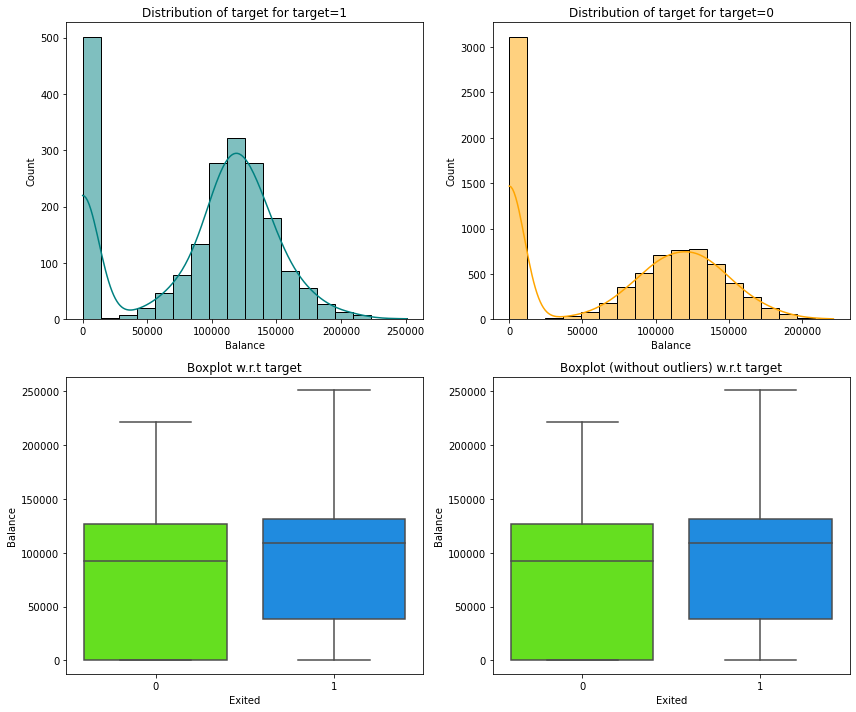

In [48]:
# Plotting the distribution and boxplots to correlate the variables Balance vs Exited
distribution_plot_wrt_target(df, "Balance", "Exited")

#### Observations:
* The variance of the balance is greater for the customers who stayed with the bank.
* The median is greater for the customers who churned.
* No outliers were observed.
* What is striking about this graph is that it suggests that the bank is losing customers with higher balances, which is not good for the bank.

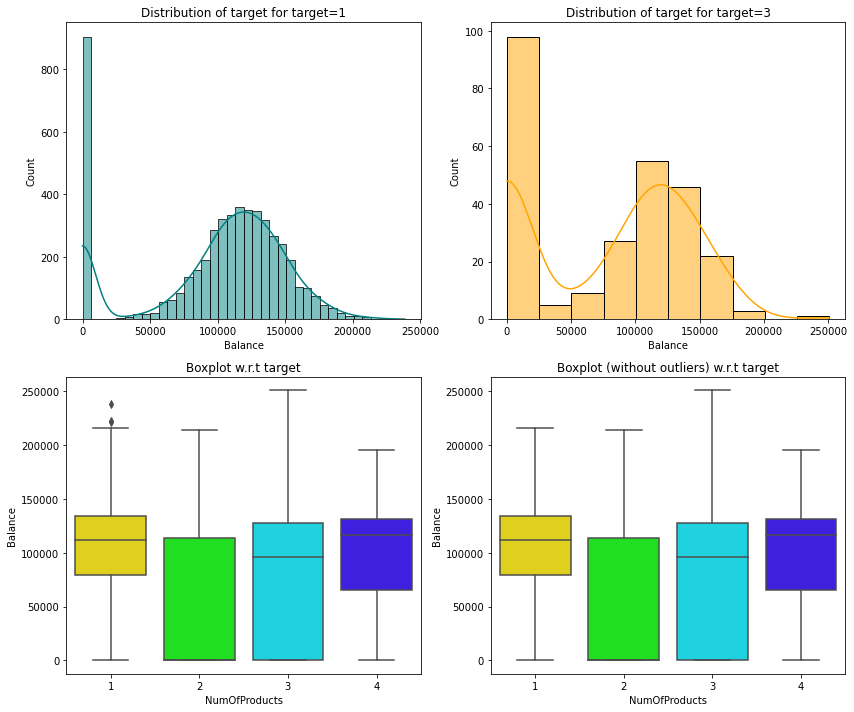

In [49]:
# Plotting the distribution and boxplots to correlate the variables Balance vs NumOfProducts
distribution_plot_wrt_target(df, "Balance", "NumOfProducts")

#### Observations:
* The variance in the balance looks pretty similiar for the clients with 1 and 4 products. The median is very similiar as well.
* The variance for the balance for customers with 2 or 3 products is greater. The median for the 2 products group wE concur with quantile.
* Few outliers are observed in the group of clients with 1 product.

#### Observations:
* As we can observe there is no significant difference in the distribution of the estimated Salary score between the customers who did not leave and churned customers.
* The variance is practically the same as the median
* No outliers were observed.

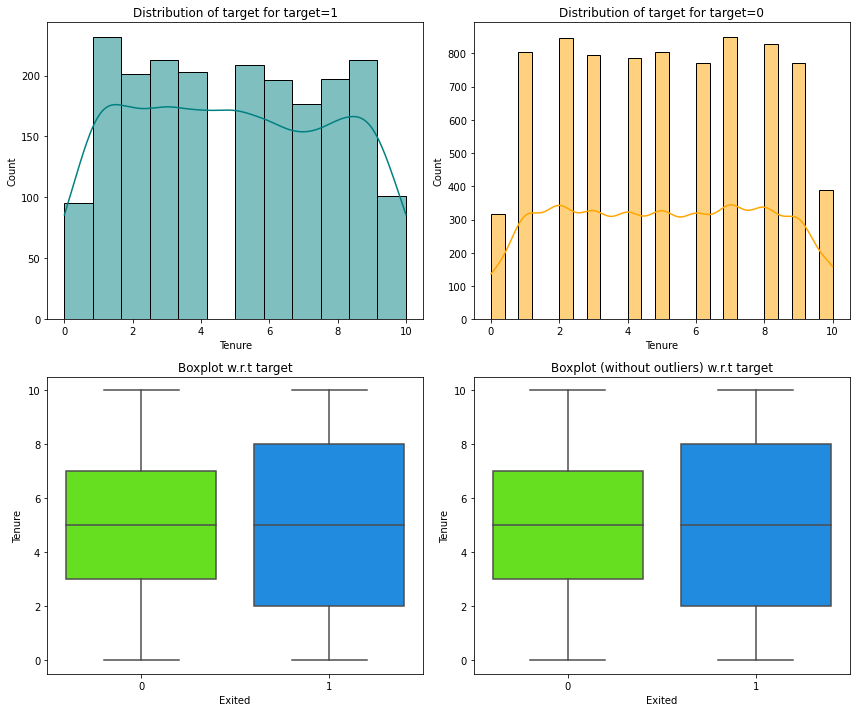

In [50]:
# Plotting the distribution and boxplots to correlate the variables Tenure vs Exited
distribution_plot_wrt_target(df, "Tenure", "Exited")

#### Observations:
* The variance in tenure variable is greater for the customers who churned. Although, the median is the same. The values are totally extreme for this variable, which means that the clients leaving spend little time with the bank or stay for a long time with the bank
* No outliers were observed.

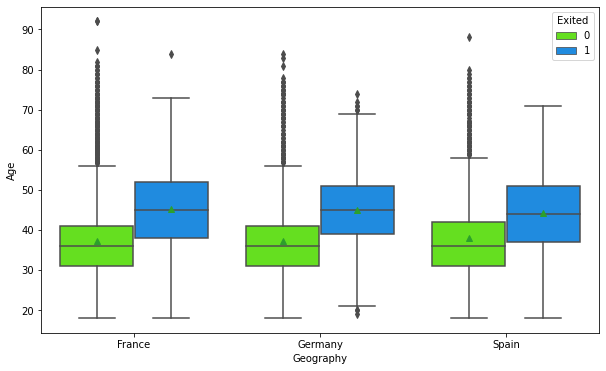

In [51]:
# Boxplot to evaluate the statistical parameters by Geography versus the Exited status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Geography",
    y="Age",
    palette="gist_rainbow",
    hue="Exited",
    showmeans=True,
)
plt.show()

#### Observations:
* The variance in the tenure variable is greater for the customers who churned. Although, the mean and median are practically the same per each binary category. The values are totally extreme for this variable, which means that the clients spend little time with the bank or stay for a long time with the bank
* No outliers were observed.
* The age for the customers who churned is greater suggesting that they need to implement different strategies for each segment of the clients to keep them as members of the bank.

In [52]:
# Lets drop the variable "RowNumber", "CustomerId", "Surname" since they are not relevant for this project
df1 = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [53]:
# Checking the new dataset
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


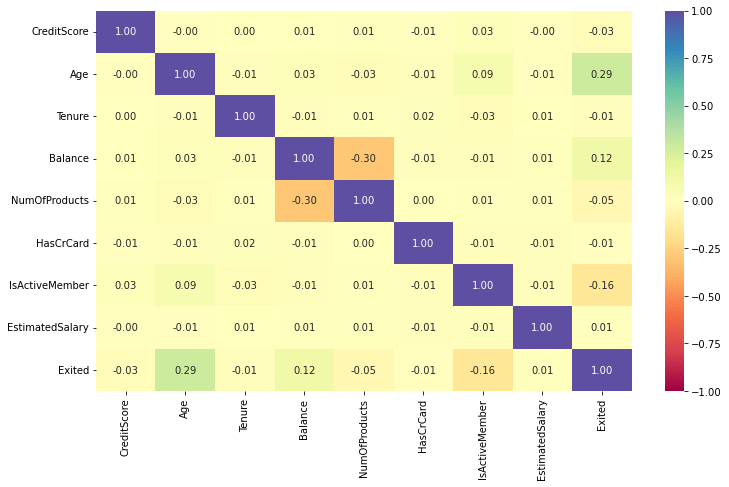

In [54]:
# Creating a Correlation matrix to evalute Pearson's cofficient between the variables
cols_list = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* The most evident linear relationships observed between the variables are:  
   * Age vs Exited = + 0.29
   * NumOfProducts = - 0.30

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

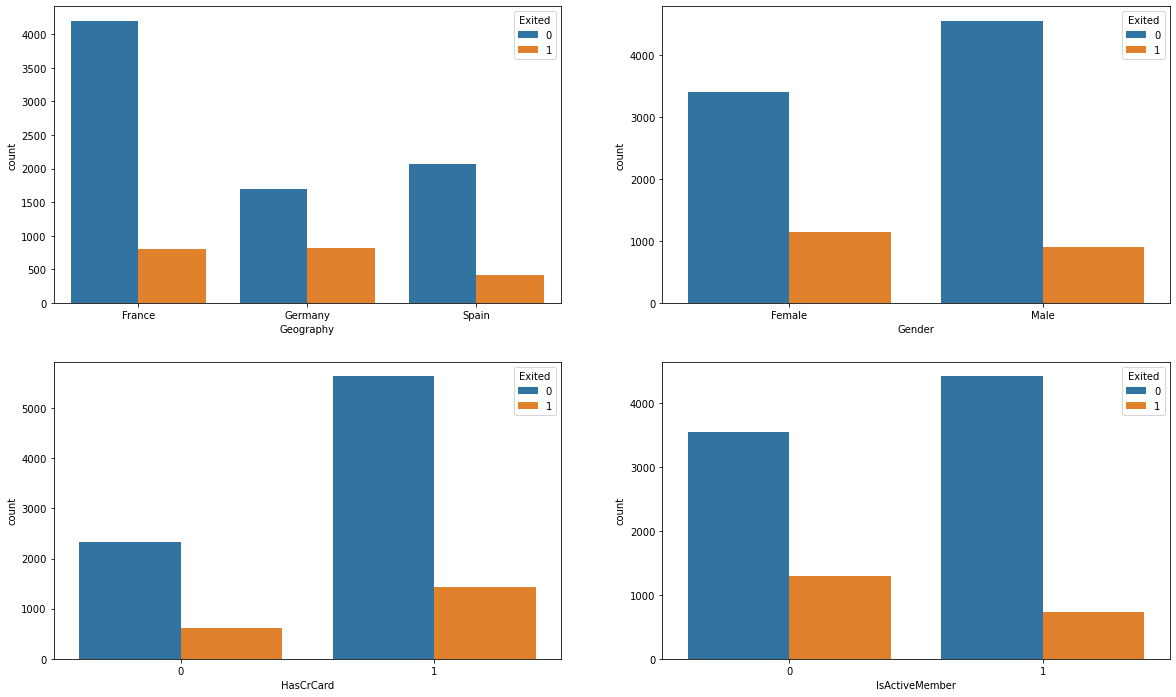

In [55]:
# Checking the 'Exited' variable versus the categorical variables with countplots
fig,axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [56]:
# Number of customers with NO credit cards in the dataset
df[df["HasCrCard"] == 0].value_counts().sum()

2945

In [57]:
# Number of customers with credit card within the dataset
df[df["HasCrCard"] == 1].value_counts().sum()

7055

In [58]:
# Number of customers with NO credit cards leaving the bank
df[
    (df["HasCrCard"] == 0) & (df["Exited"] == 1)
].value_counts().sum()

613

In [59]:
#Number of customers with credit cards leaving the bank
df[
    (df["HasCrCard"] == 1) & (df["Exited"] == 1)
].value_counts().sum()

1424

In [60]:
# Percentage of the customers with NO credit cards leaving the bank
print(round(df[
    (df["HasCrCard"] == 0) & (df["Exited"] == 1)
].value_counts().sum()/df[df["HasCrCard"] == 0].value_counts().sum()*100, 2))

20.81


In [61]:
# Percentage of the customers with credit cards and leaving the bank
print(round(df[
    (df["HasCrCard"] == 1) & (df["Exited"] == 1)
].value_counts().sum()/df[df["HasCrCard"] == 1].value_counts().sum()*100, 2))

20.18


#### Observations:
* From the graphs we can see that the main percentage of the data is related to customers from France and where the churning ratio is around of 1/5.
* The lower churning proportion belong to Spain and the greater churning proportion belong to Germany which is around the 40%.
* The female leaving the bank relation is greater than the male customers leaving the bank.
* The most of the customers leaving the bank have credit cards but the proportion versus the clients with NO credit card is almost the same in percentage 20% approximately.
* The inactive members tend to churn more than the active members. The proportion of the inactive members within the dataset is important so it would be recommended to evaluate the cause of the inactivity in order to try to find solutions about this important percentage of the members.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


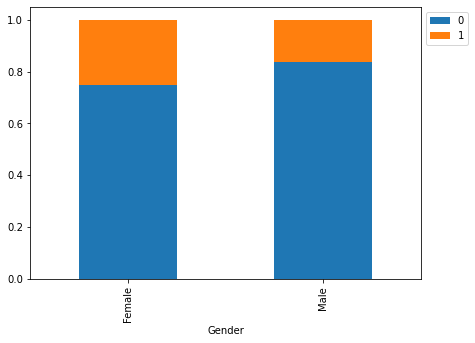

In [62]:
# Creating a stacked barplot for the relationship between Gender and Exited variables
stacked_barplot(
    df, "Gender", "Exited"
) 

#### Observations:
* The female leaving the bank relation is greater than the male customers leaving the bank.
* The female customers percentage leaving the bank before the first 6 months is around 25% while the male is around 16%.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


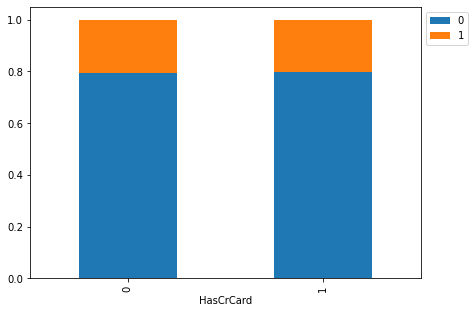

In [63]:
# Creating a stacked barplot for the relationship between HasCrCard and Exited variables
stacked_barplot(
    df, "HasCrCard", "Exited"
) 

#### Observations:
* The percentage of clients who leave the bank is the same for both those who have and those who do not have credit cards (20%), even though the proportion of those who have a credit card is 3 times greater than those who do not have a credit card.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


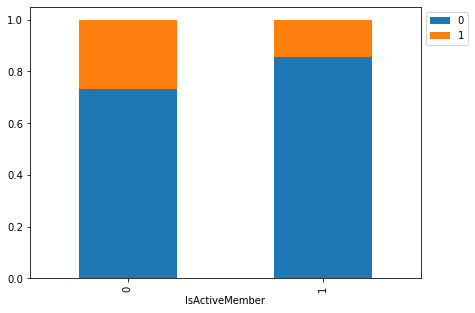

In [64]:
# Creating a stacked barplot for the relationship between HasCrCard and Exited variables
stacked_barplot(
    df, "IsActiveMember", "Exited"
) 

#### Observations:
* The percentage of inactive members leaving the bank is 26% while the percentage of active customers leaving the bank before the first 6 months is 14%. The proportion for those being inactive members and for those being active is 48% and 52% respectively.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


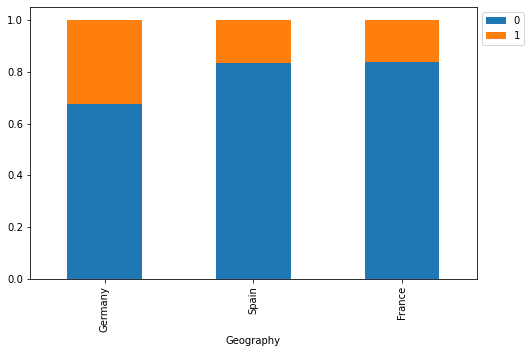

In [65]:
# Creating a stacked barplot for the relationship between Geography and Exited variables
stacked_barplot(
    df, "Geography", "Exited"
) 

#### Observations:
* The percentage of the customers leaving the bank is greater for the clients from Germany with 32%(814 out of 2509 records).
* The percentage of the customers leaving the bank in Spain is 17%(413 out of 2477 records).
* The percentage of the customers leaving the bank in France is 16%(810 out of 5014 records).
* France is the country where most of the data in this dataset comes from, representing the 50.14% of the dataset. 

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


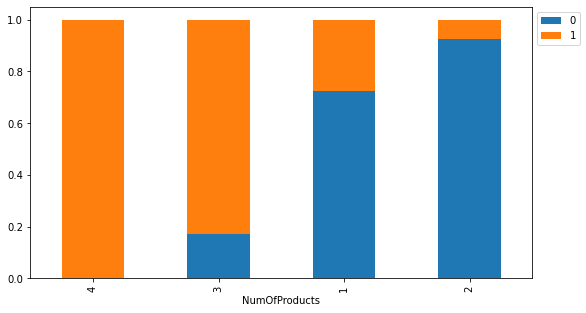

In [66]:
# Creating a stacked barplot for the relationship between Geography and Exited variables
stacked_barplot(
    df, "NumOfProducts", "Exited"
) 

In [67]:
# Checking the Number of products = 4 versus the weight within the dataset per country
print(df[(df["NumOfProducts"] == 4) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["NumOfProducts"] == 4) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["NumOfProducts"] == 4) & (df["Geography"] == 'Spain')].value_counts().sum())

24
29
7


In [68]:
# Checking the Number of products = 3 versus the weight within the dataset per country
print(df[(df["NumOfProducts"] == 3) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["NumOfProducts"] == 3) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["NumOfProducts"] == 3) & (df["Geography"] == 'Spain')].value_counts().sum())

96
104
66


In [69]:
# Checking the Number of products = 2 versus the weight within the dataset per country
print(df[(df["NumOfProducts"] == 2) & (df["Geography"] == 'Germany')].value_counts().sum())
print(df[(df["NumOfProducts"] == 2) & (df["Geography"] == 'France')].value_counts().sum())
print(df[(df["NumOfProducts"] == 2) & (df["Geography"] == 'Spain')].value_counts().sum())

1040
2367
1183


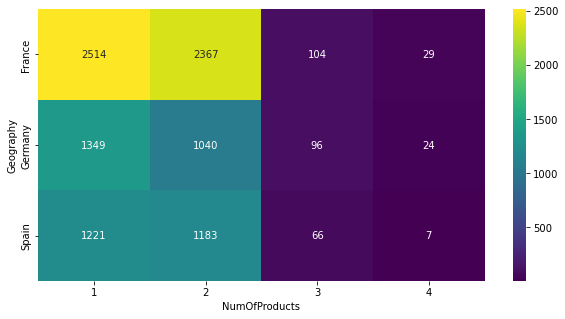

In [70]:
# Creating a heatmap for the crosstab between Geography and NumOfProducts
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df["Geography"], df["NumOfProducts"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Geography")
plt.xlabel("NumOfProducts")
plt.show()


#### Observations:
* The percentage of the customers leaving the bank and having 4 products is 100% (60 out of 60 records).
* The percentage of the customers leaving the bank and having 3 products is 83% (220 out of 266 records).
* The percentage of the customers leaving the bank and having 1 product is 28% (1409 out of 5084 records).
* The percentage of the customers leaving the bank and having 2 product is 28% (348 out of 4590 records).

### Data Pre-processing
- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [71]:
# Dropping 'Exited' variable and declare it as the target Variable
X = df1.drop(['Exited'],axis=1)
Y = df1[['Exited']]

In [72]:
# Validating the changes
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [73]:
# Validating the dependant variable
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [74]:
# Importing the lable encoder to transform the categorical variable "Geography"
# Defining the transformed column in a new dataset
from sklearn.preprocessing import LabelEncoder
labelencoder_Geography = LabelEncoder()
X['New_Geography']= labelencoder_Geography.fit_transform(X['Geography'])

In [75]:
# Importing the lable encoder to transform the categorical variable "Gender"
# Defining the transformed column in a new dataset
from sklearn.preprocessing import LabelEncoder
labelencoder_Gender = LabelEncoder()
X['New_Gender']= labelencoder_Gender.fit_transform(X['Gender'])

In [76]:
# Checking the changes in the dataset
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Geography,New_Gender
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,2,0


In [78]:
X["New_Geography"].value_counts()

0    5014
1    2509
2    2477
Name: New_Geography, dtype: int64

In [79]:
# Dropping the old columns Geography & Gender
X.drop(['Geography', 'Gender'],axis=1, inplace=True)

In [80]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Geography,New_Gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0


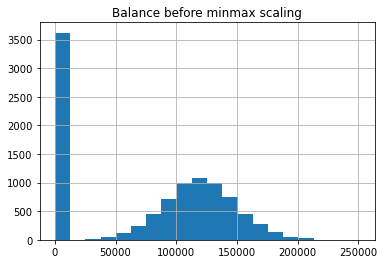

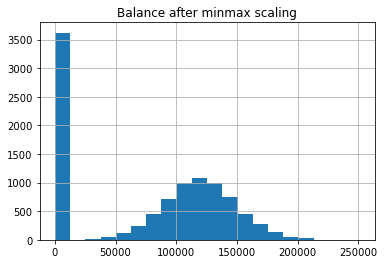

In [81]:
# Using MinMax scaler to do the data normalization before splitting the dataset to avoid Data Leakage
# if the minimum and maximum are treated as fixed, this is also a linear transformation so the shape is the same
X['Balance'].hist(bins=20)
plt.title('Balance before minmax scaling')
plt.show()
# Columns to be normalized
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = MinMaxScaler().fit_transform(
   X[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
)
df['Balance'].hist(bins=20)
plt.title('Balance after minmax scaling')
plt.show()

In [82]:
# Validating the new version of the dataset
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Geography,New_Gender
0,0.54,0.32,0.20,0.00,1,1,1,0.51,0,0
1,0.52,0.31,0.10,0.33,1,0,1,0.56,2,0
2,0.30,0.32,0.80,0.64,3,1,0,0.57,0,0
3,0.70,0.28,0.10,0.00,2,0,0,0.47,0,0
4,1.00,0.34,0.20,0.50,1,1,1,0.40,2,0


In [83]:
# Splitting the dataset into the Training and Testing set.
# Using stratify for unbalanced class problem
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [84]:
# Validating the training dataset 
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Geography,New_Gender
2151,0.81,0.53,0.70,0.00,1,1,0,0.80,0,1
8392,0.78,0.19,0.30,0.41,1,1,0,0.32,1,1
5006,0.81,0.26,0.00,0.45,2,1,1,0.59,1,0
4117,0.42,0.26,0.50,0.00,2,1,0,0.42,0,1
7182,0.68,0.42,0.60,0.44,2,0,1,0.54,1,1


In [85]:
# Validating the test dataset
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Geography,New_Gender
5702,0.47,0.24,0.70,0.00,2,1,0,0.47,0,1
3667,0.35,0.20,0.40,0.52,2,0,0,0.28,1,1
1617,0.41,0.30,0.40,0.00,2,0,1,0.53,2,0
5673,0.58,0.22,0.50,0.56,2,0,0,0.17,2,1
4272,0.58,0.22,0.30,0.31,1,1,1,0.84,2,0


In [86]:
# Obtaining the data shape for the training and test datasets and the weight of the classes
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (8000, 10)
Shape of test set :  (2000, 10)
Percentage of classes in training set:
Exited
0        0.80
1        0.20
dtype: float64
Percentage of classes in test set:
Exited
0        0.80
1        0.20
dtype: float64


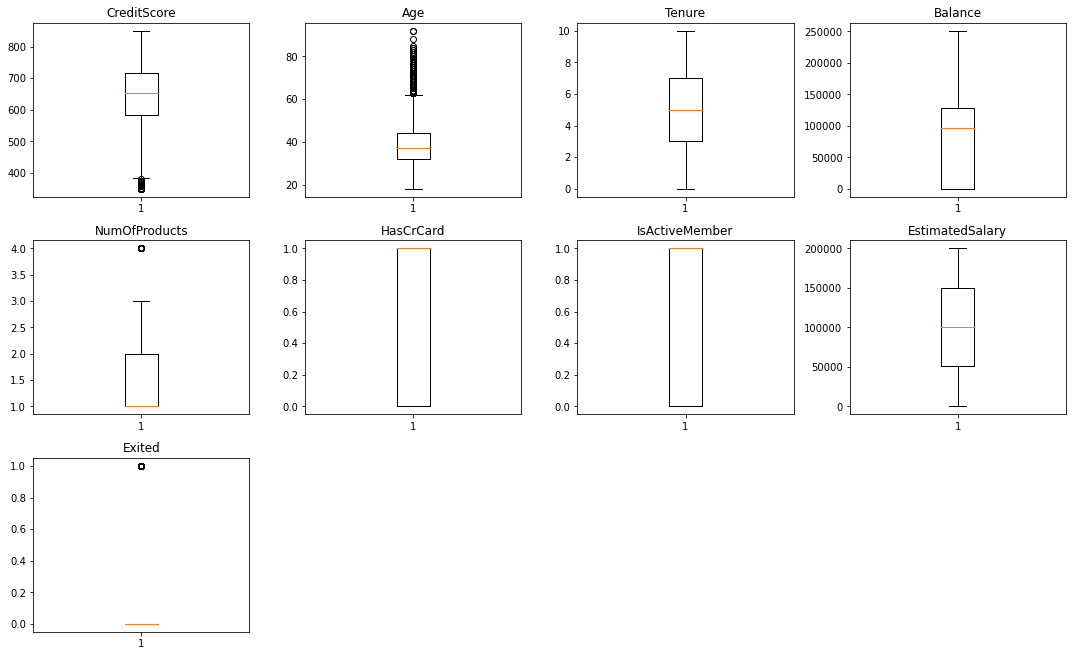

In [87]:
# Lets run the outlier detection using boxplot after the normalization
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Model Building

#### Observations:
* Some outliers are observed under the lower whisker in the "Tenure" variable .
* Also, some outliers are observed over the upper whisker in the "Age" variable.
* For general purposes of this project, we will consider the outliers within the normal range and will not do a deep analysis of them. However, it would be advisable in later stages to investigate in more detail the outliers of these variables.

#### **A model can make wrong predictions in the following ways:**
* Predicting that a client is going to churn, when he/she is not going to churn. 
* Predicting that a client is not going to churn, when he/she is going to churn.

#### **Which case is more important?**

For the purpose of this project we are going to pay special attention to the False Negatives. Predicting wrongly that a client is not going to churn when in fact he/she is going to, would lead to a financial loss for the bank, and it might affect the bank's growth.

#### **How to reduce this loss i.e need to reduce False Negatives?**

Since The False Negative errors are important for us to minimize, the company would want the Recall evaluation metric to be maximized/ Hence, the focus should be on increasing the Recall score rather than focusing on other metrics like Precision.

In [88]:
# Creating the functions to calculate different metrics and confusion matrix
# Taken from the previous projects
# The model_performance_classification_sklearn function will be used to check the model performance of models.
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [89]:
# The confusion_matrix_sklearn function will be used to plot the confusion matrix.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest

In [90]:
# Defining the random forest model
# Setting random state = 1 and class_weight = balanced
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)

# Fitting the random forest model on the training dataset
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training dataset

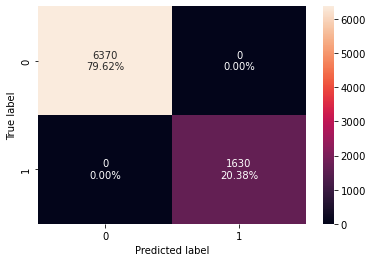

In [91]:
# Creating the confusion matrix for the training dataset
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [92]:
# Calculating the metrics of the model on the training dataset
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)

# Checking the performance on the training dataset
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


#### Observations:
* The Random Forest default model is overfitting in the training dataset so we can expect a poor performance on the test dataset.
* In this iteration, both the FN values and the FP values represents 0% suggesting the overfitting.
* True Negatives represents the 79.62% and the True positives TP represents 20.38%.

#### Checking model performance on test set

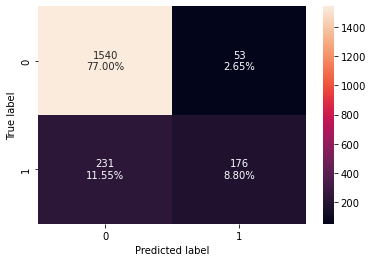

In [93]:
# Creating the confusion matrix for the test dataset
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [94]:
# Checking the performance for the test dataset
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.86,0.43,0.77,0.55


#### Observations:
* The Random Forest model with default parameters is overfitting, there is a evident difference between all the metrics in comparison with the training dataset.
* In this iteration, the FN values represents the 11.50% (230), meanwhile the FP values represents the 2.56%.
* True Negatives decreased from 79.62% to 77% and the True positives TP decreased as well from 20.38% to 8.85%.
* The Recall decreased from 1 to 0.43 in test performance.
* Let's see if we can reduce overfitting and improve performance on test data by applying tuning hyperparameters to the Random Forest model.

### Random Forest with Hyperparameter Tuning 

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc

In [95]:
# Taken from the Bagging hands on Project
# Choosing the type of the classifier
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Comparing the parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
# Running grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance on training set

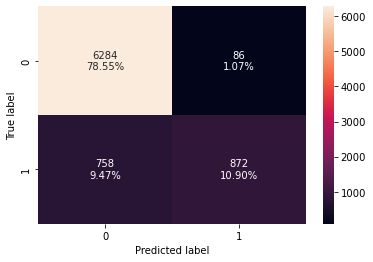

In [96]:
# Creating the confusion matrix for the training data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [97]:
# Creating a performance table for the train data on tuned estimator
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.89,0.53,0.91,0.67


#### Observations:
* The Random Forest tuned model is performing better in the training dataset than the previous iteration with default values.
* In this iteration, we reduced slightly the FN values from 11.55% to 9.47%.
* The FP values also were slightly reduced from 2.65% to 1.07%.
* True Negatives represents 78.55% and the True positives TP represents the 10.90%.
* The Recall score was improved from 0.43 to 0.53 in this iteration.

#### Checking model performance on test set

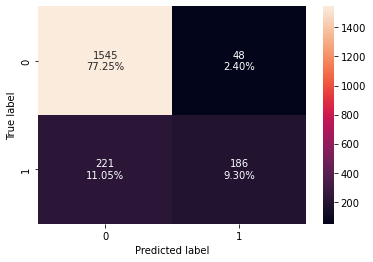

In [98]:
# Creating the confusion matrix for the test dataset on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [99]:
# Creating a performance table for the test dataset on tuned estimator
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.87,0.46,0.79,0.58


#### Observations:
* The Random Forest tuned model is performing poorly on the test dataset, its performance was slightly diminished from the previous iteration with the training dataset.
* In this iteration, the FN values increased from 9.47% to 11.05%, meanwhile the FP values increased from 1.07% to 2.40%.
* True Negatives decreased from 78.55% to 77.25% and the True positives TP decreased from 10.90% to 9.30%.
* The Recall score decreased its performance evidently from 0.53 to 0.46.

## Building the Models with ANN

### Model 1

In [100]:
# Taken from the 'Data Scientist attrition' project
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [101]:
# Lets initialize the Artificial Neural Network ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1], units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [102]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['Recall'])

In [103]:
# Summary of the parameters of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Fitting the model 
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 5s 2ms/step - loss: 0.5149 - recall: 0.0069 - val_loss: 0.4935 - val_recall: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 0s 729us/step - loss: 0.4945 - recall: 0.0000e+00 - val_loss: 0.4891 - val_recall: 0.0000e+00
Epoch 3/50
200/200 [==============================] - 0s 707us/step - loss: 0.4892 - recall: 0.0000e+00 - val_loss: 0.4854 - val_recall: 0.0000e+00
Epoch 4/50
200/200 [==============================] - 0s 721us/step - loss: 0.4853 - recall: 0.0000e+00 - val_loss: 0.4824 - val_recall: 0.0000e+00
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4819 - recall: 0.0000e+00 - val_loss: 0.4799 - val_recall: 0.0000e+00
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4789 - recall: 0.0000e+00 - val_loss: 0.4773 - val_recall: 0.0000e+00
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4762 - recall: 0.0000e+00 - val_loss: 0.4755 -

63/63 [==============================] - 0s 992us/step - loss: 0.3897 - recall: 0.2875


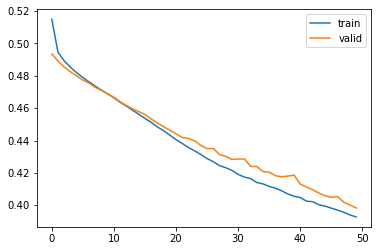

In [105]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

#### Observations:
* We can observe that the behavior in the loss curve is low in noise even though the optimizer utilized was the SGD.
* The slope of the curve suggest a low learning rate and it is slightly overfitting.

In [106]:
# Checking the predicted values for each class
# Predicting the results using the best as a threshold
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [107]:
# Creating the function for the confusion matrix
# Taken  form the previous projects within the course
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
# CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

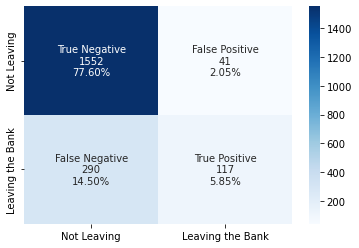

In [108]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Leaving','Leaving the Bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [109]:
# Validating the Recall as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.74      0.29      0.41       407

    accuracy                           0.83      2000
   macro avg       0.79      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



#### Observations:
* This has a poor performance comparing the results with the previous Random Forest tuned model.
* In this simple ANN Model, the FN values represents the 14.50% meanwhile in the random forest tuned model they were around 11%.
* The recall decreased from 0.43 to 0.29 in this model which is not good for our purposes.
* False Positives remained around 2%.
* True Negatives remained almost the same around 77% to 77.25% and the True positives TP decreased from 9.30% to 5.85%.
* The behavior in the loss curve is low in noise even though the optimizer utilized was the SGD.
* The slope of the curve suggest a low learning rate and it is slightly overfitting.

### Model 2

In [120]:
# Initializing the model
model2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model2.add(Dense(1, activation='sigmoid'))
# We use the sigmoid because we want probability outcomes
# lets Compile the ANN using the Adam optimizer, binary crossentropy for the loss function, and Recall as the metric
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [121]:
# Model 2 summary
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Fitting the model 2
history2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 0.5569 - recall: 0.0824 - val_loss: 0.4700 - val_recall: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 0s 923us/step - loss: 0.4556 - recall: 0.0534 - val_loss: 0.4382 - val_recall: 0.1750
Epoch 3/50
100/100 [==============================] - 0s 916us/step - loss: 0.4280 - recall: 0.1847 - val_loss: 0.4202 - val_recall: 0.2344
Epoch 4/50
100/100 [==============================] - 0s 912us/step - loss: 0.4083 - recall: 0.2588 - val_loss: 0.4050 - val_recall: 0.3344
Epoch 5/50
100/100 [==============================] - 0s 872us/step - loss: 0.3968 - recall: 0.3046 - val_loss: 0.3931 - val_recall: 0.3156
Epoch 6/50
100/100 [==============================] - 0s 961us/step - loss: 0.3886 - recall: 0.3183 - val_loss: 0.3824 - val_recall: 0.3562
Epoch 7/50
100/100 [==============================] - 0s 948us/step - loss: 0.3809 - recall: 0.3443 - val_loss: 0.3830 - val_recall: 0.4187
Epoch 8/50
100/100

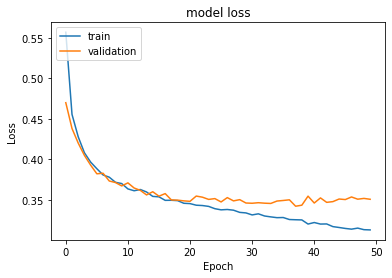

In [123]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Observations:
* We can observe that the behavior in the loss curve is relatively smooth, low in noise using the Adam optimizer.
* The slope of the curve suggest a high learning rate but we can infer overfitting.

Best Threshold=0.187149, G-Mean=0.762


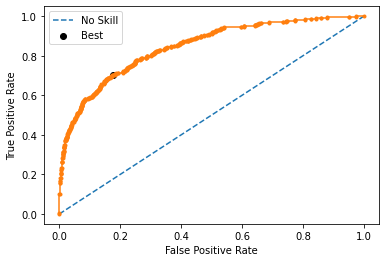

In [124]:
# Taken from the 'Data scientist attrition Project'
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# predict probabilities
yhat1 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [125]:
# Checking the predicted values for each class
# Predicting the results using the best as a threshold
y_pred_e1=model2.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

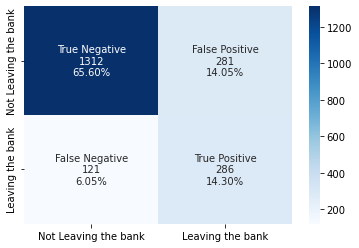

In [172]:
# Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Leaving the bank','Leaving the bank']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [171]:
#Recall as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e1)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.50      0.70      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



#### Observations:
* This Model has the better performance so far comparing with the previous models.
* In this simple Model, we use 64 neurons as input layers, 32 & 32 as hidden layers and 1 as the output layer.
* the FN values represents the 6.05% meanwhile in the previous ANN model they were around 14.50%.
* The recall markedly increased from 0.29 to 0.76 in this model which is really good for our purposes.
* False Positives increased from 2% to 14%.
* True Negatives decreased from 77% to 66% and the True positives TP increased from 5.85% to 14.30%.
* The behavior in the loss curve is relatively smooth, low in noise using the Adam optimizer.
* The slope of the curve suggest a high learning rate but we can infer overfitting.

### Model 3

In [128]:
# Taken from the 'Data Science attrition Project'
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [134]:
# Initializing the model 3 
model3 = Sequential()
# Model using Relu as activation function, Adam optimizer, Sigmoid output function but increasing the input and hiddden layers
# Adding Input layer
model3.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
# Adding the hidden
model3.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
# Adding the output layers
model3.add(Dense(1, activation = 'sigmoid'))
# we have an output of 1 node, which is the the desired dimensions of our output (leave the bank or not)
# We use the sigmoid because we want probability outcomes
# lets Compile the ANN using the Adam optimizer, binary crossentropy for the loss function, and Recall as the metric
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [135]:
# Obtaining the model 3 summary
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Fitting the model 3
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.4596 - recall: 0.1176 - val_loss: 0.4389 - val_recall: 0.0469
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4128 - recall: 0.2847 - val_loss: 0.4178 - val_recall: 0.1531
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3966 - recall: 0.3244 - val_loss: 0.3835 - val_recall: 0.3313
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3742 - recall: 0.3710 - val_loss: 0.3744 - val_recall: 0.4250
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3703 - recall: 0.4008 - val_loss: 0.3566 - val_recall: 0.4563
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3628 - recall: 0.4046 - val_loss: 0.3554 - val_recall: 0.4313
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3532 - recall: 0.4305 - val_loss: 0.3611 - val_recall: 0.4500
Epoch 8/50
100/100 [==============

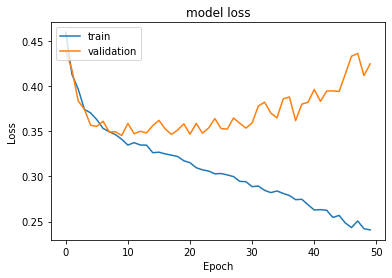

In [137]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Observations:
* We can observe that the behavior in the loss curve is higly noisy.
* The slope of the curve suggest a very high learning rate but with a markedly overfitting.

Best Threshold=0.169842, G-Mean=0.735


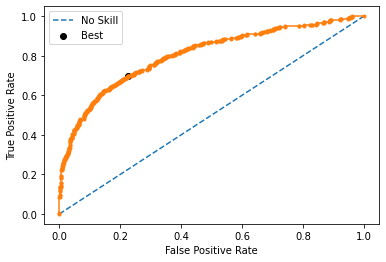

In [138]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# predict probabilities
yhat2 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [139]:
# Checking the predicted values for each class
# Predicting the results using the best as a threshold
y_pred_e2=model3.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

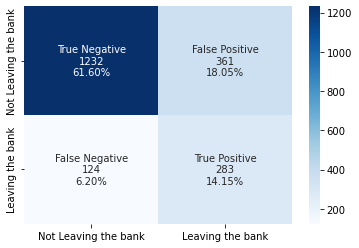

In [173]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Leaving the bank','Leaving the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [170]:
# Recall as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e2)
print(cr3)

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1593
           1       0.44      0.70      0.54       407

    accuracy                           0.76      2000
   macro avg       0.67      0.73      0.69      2000
weighted avg       0.81      0.76      0.78      2000



#### Observations:
* This Model has the better performance so far comparing with the previous models.
* In this more complex Model, we use 256 neurons as input layers, 128, 64, and 32 as hidden layers and 1 as the output layer.
* the FN values increased from 6.05% to 6.20 in comparison with the previous ANN model.
* The recall slightly decreased from 0.76 to 0.70 in this model.
* False Positives increased from 14% to 18%.
* True Negatives decreased from 66% to 61% and the True positives TP slightly decreased from 14.30% to 14.15%.
* The behavior in the loss curve is higly noisy.
* The slope of the curve suggest a very high learning rate but with a markedly overfitting which is not good for our purposes.

### Model 4

In [202]:
# Taken from the 'Data Scientis Attrition Project'
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [229]:
# Initializing the model 4
# Creating a more complex model using Dropout and Batch normalization as regularization method
def model4_new(lr,batch_size):  
    np.random.seed(1350)
    model4 = Sequential()
    model4.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.30))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model4.add(Dense(128,activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.30))
    model4.add(Dense(64,activation='relu'))
    model4.add(Dropout(0.30))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model4.add(Dense(32,activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.20))
    model4.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['Recall'])
    return model

In [230]:
# Building the model using the grid search parameters 
keras_estimator = KerasClassifier(build_fn=model4_new, verbose=1)
# defining the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=1)

In [231]:
# Finding the best parameters for the model 4
random_result1 = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 
# Summarize results
print("Best: %f using %s" % (random_result1.best_score_, random_result1.best_params_))
means = random_result1.cv_results_['mean_test_score']
stds = random_result1.cv_results_['std_test_score']
params = random_result1.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 1ms/step - loss: 0.4087 - recall: 0.3031 - val_loss: 0.4071 - val_recall: 0.2875
Best: nan using {'lr': 0.01, 'batch_size': 32}


In [232]:
# Model 4 summary
estimator_v4=model4_new(batch_size=random_result1.best_params_['batch_size'],lr=random_result1.best_params_['lr'])
estimator_v4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [233]:
# Fitting the model 4
optimizer = tf.keras.optimizers.Adam(random_result1.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])
history_4=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 1ms/step - loss: 0.4080 - recall: 0.3031 - val_loss: 0.4064 - val_recall: 0.2875
Epoch 2/50
200/200 [==============================] - 0s 841us/step - loss: 0.4073 - recall: 0.3015 - val_loss: 0.4070 - val_recall: 0.3187
Epoch 3/50
200/200 [==============================] - 0s 846us/step - loss: 0.4072 - recall: 0.3076 - val_loss: 0.4050 - val_recall: 0.2937
Epoch 4/50
200/200 [==============================] - 0s 970us/step - loss: 0.4062 - recall: 0.3099 - val_loss: 0.4055 - val_recall: 0.3063
Epoch 5/50
200/200 [==============================] - 0s 854us/step - loss: 0.4079 - recall: 0.3130 - val_loss: 0.4046 - val_recall: 0.3219
Epoch 6/50
200/200 [==============================] - 0s 886us/step - loss: 0.4074 - recall: 0.3092 - val_loss: 0.4042 - val_recall: 0.2969
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4059 - recall: 0.3061 - val_loss: 0.4053 - val_recall: 0.3375
Epoch 8/50
200/200 [====

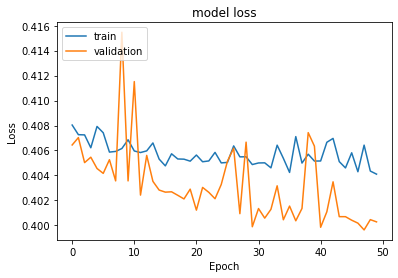

In [234]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Observations:
* That the behavior in the loss curve is higly noisy.
* The slope of the curve suggest a low learning rate with a very evident overfitting which is not good for our purposes.

Best Threshold=0.179235, G-Mean=0.731


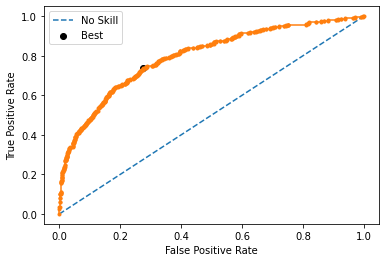

In [235]:
# Taken from the 'Data scientist Attritio Project'
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [236]:
# Checking the predicted values for each class
# Predicting the results using the best as a threshold
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds5[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

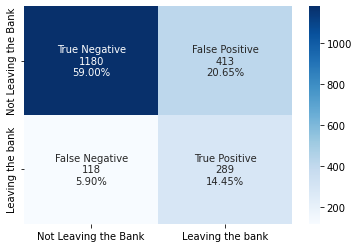

In [237]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Leaving the Bank','Leaving the bank']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [255]:
# Recall as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1593
           1       0.41      0.71      0.52       407

    accuracy                           0.73      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.73      0.76      2000



#### Observations:
* This Model has a slightly better performance compared with the previous models.
* In this more complex Model, we use the same setting of the last model but with the intercalation of the dropout and batch normalization as regularization methods.
* the FN values decreased from 6.20% to 5.90% in comparison with the previous ANN model.
* The recall slightly increased from 0.70 to 0.71 in this model.
* False Positives increased from 18% to 20%.
* True Negatives decreased from 61% to 59% and the True positives TP slightly increased from 14.15% to 14.45%.
* The behavior in the loss curve is higly noisy.
* The slope of the curve suggest a low learning rate with a pretty evident overfitting which is not good for our purposes.

### Model 5

In [243]:
# Taken from the 'Data Scientist Attrition Project'
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [244]:
# Initializing the model 5 appliying Dropout as teh regularization method
model5 = Sequential()
# adding the input layer and applying dropout
model5.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model5.add(Dropout(0.2))
# Adding the hidden layers with dropout
model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(32,activation='relu'))
# adding the Output layer
model5.add(Dense(1, activation = 'sigmoid'))

In [245]:
# Model 5 Summary
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [246]:
# Compiling the model
optimizer = tf.keras.optimizers.Adam(0.001)
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [247]:
# Fitting the model 5
history_5 = model5.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.5040 - recall: 0.0183 - val_loss: 0.4622 - val_recall: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4547 - recall: 0.0374 - val_loss: 0.4377 - val_recall: 0.2625
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.1985 - val_loss: 0.4125 - val_recall: 0.2281
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4036 - recall: 0.3122 - val_loss: 0.3760 - val_recall: 0.4250
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3949 - recall: 0.3382 - val_loss: 0.3672 - val_recall: 0.3844
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3862 - recall: 0.3481 - val_loss: 0.3545 - val_recall: 0.4563
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3781 - recall: 0.3687 - val_loss: 0.3641 - val_recall: 0.4344
Epoch 8/50
100/100 [==========

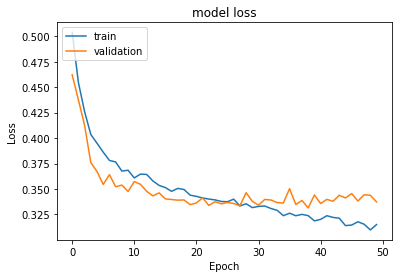

In [248]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Observations:
* The behavior in the loss curve show some noise.
* The slope of loss curve suggest a good learning rate but with a slight overfitting.

Best Threshold=0.004550, G-Mean=0.697


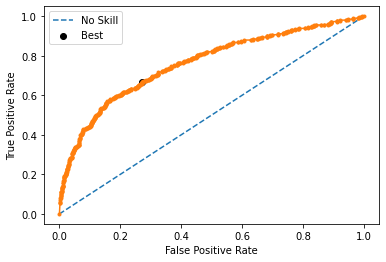

In [249]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# predict probabilities
yhat4 = model5.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [250]:
# Checking the predicted values for each class
# Predicting the results using the best as a threshold
y_pred_e5=model5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

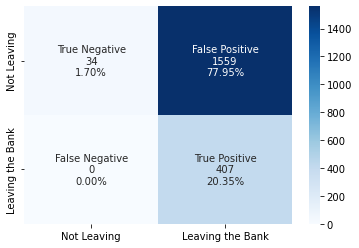

In [251]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e5)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Leaving','Leaving the Bank']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [256]:
# Validating the Recall as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      1593
           1       0.21      1.00      0.34       407

    accuracy                           0.22      2000
   macro avg       0.60      0.51      0.19      2000
weighted avg       0.84      0.22      0.10      2000



#### Observations:
* In terms of False Negatives this Model has the best performance compared with all the previous models but in general terms it doesn't.
* In this complex Model, we use the same setting of the last model but just using the intercalation of the dropout as regularization method.
* the FN values decreased from 5.90% to 0% in comparison with the previous ANN model, which is great for the target class.
* The recall markedly increased 0.71 to 1 in this model.
* False Positives increased from 20% to 77%.
* True Negatives greatly decreased from 59% to 1.70% and the True positives TP increased from 14.45% to 20.35%.
* The behavior in the loss curve show some noise.
* The slope of loss curve suggest a good learning rate but with a slight overfitting.

## Actionable Insights, Conclusions and Recommendations

* The dataset can be considered as a small dataset since it has just 14 columns and 10000 rows.
* The class associated to the customers who did not leave the bank(0) was represented by the 79.63% while the class belonging to the clients leaving the bank(1) was represented by the 20.37% of the records so it could be considered as unbalanced dataset.
* CreditScore: the mean is 650.53 points, the used scores are between 350 and 850 points in this dataset with a standard deviation of 96.65. The 75% of the data is over 584 meanwhile the 25% of the data is over 718 points of score. 
* Age: the mean is 38.92 years, the age is between 18 and 92 years in this dataset with a standard deviation of 10.49 years. The 75% of the data is over 32 meanwhile the 25% of the data is over 44.
* Tenure: the mean is 5.1, the values are between 0 and 10 in this dataset with a standard deviation of 2.89. The 75% of the data is over 3 meanwhile the 25% of the data is over 7. 
* Balance: the mean is 76485.89, the  values are between 0 and 250898.09 in this dataset with a standard deviation of 62397.41. The 75% of the data is over 0 meanwhile the 25% of the data is over 127644.24.
* NumOfProducts: the mean is 1.53, the values are between 1 and 4 in this dataset with a standard deviation of 0.58. The 75% of the data is over 1 megapixels meanwhile the 25% of the data is over 2.
* EstimatedSalary: the mean is 100090.24, the values are between 11.58 and 199992.48 in this dataset with a standard deviation of 57510.49. The 75% of the data is over 51002.11 meanwhile the 25% of the data is over 149388.25.
* The dataset contains 50.14% samples or records of clients from France, The 25.09% of the records belongs to clients from Germany, and The 24.77% of the records are represented by clients from Spain. Therefore, it would be good to have more balanced samples in terms of the country of origin to avoid bias.
* France had the most of the records or customers with a credit card with 3543 out of 7055, representing the 50.21% of the data. Also. France had the most of the records with NO credit cards among the customers within the dataset with 1471 out of 2945, representing the 49.94% of the data.
* we observed that 2037 records with clients leaving the bank 814 belong to the customers from Germany, representing the 39.96%. 
* we observed that 2037 records with clients leaving the bank 810 belong to the customers from France, representing the 39.76%.
* we observed that 2037 records with clients leaving the bank 413 belong to the customers from Spain, representing the 20.27%.
* we observed that 2037 records with clients leaving the bank 814 belong to the customers from Germany, representing the 39.96%. 
* we observed that 2037 records with clients leaving the bank 810 belong to the customers from France, representing the 39.76%.
* we observed that 2037 records with clients leaving the bank 413 belong to the customers from Spain, representing the 20.27%.
* we observed that 7963 records with clients NOT leaving the bank 1695 belong to the customers from Germany, representing the 21.28%. 
* we observed that 7963 records with clients NOT leaving the bank 4204 belong to the customers from France, representing the 52.79%.
* we observed that 7963 records with clients NOT leaving the bank 2064 belong to the customers from Spain, representing the 25.91%.
* Germany has the most of the clients leaving the bank before 6 months with 39.96% (814 out 2037).
* France has the most of the clients NOT leaving the bank before 6 months with 52.79% (4204 out 7963) so it would be helpful to evaluate the difference, facilities or any others elements between the banks within the 3 countries.
* 5084 records had at least 1 produc(50.84%), 4590 recods had 2 products(45.90%), 266 records had 3 products(2.66%), and 60 records had 4 products(0.6%).
* From the data we saw that the bank is losing customers with the higher balances, which is not good for the bank. It is highly recommended to implement plans or incentives to hold those customers with higher balances.
* The most of the clients leaving spend little time with the bank or stay for a longer time with the bank.
* The age for the customers who churned is greater suggesting that they need to implement different strategies for each segment of the clients to keep them as members of the bank.
* The lower churning proportion belong to Spain and the greater churning proportion belong to Germany which is around the 40%.
* The female leaving the bank relation is greater than the male customers leaving the bank.
* The percentage of inactive members leaving the bank is 26% while the percentage of active customers leaving the bank before the first 6 months is 14%.
* The percentage of clients who leave the bank is the same for both those who have and those who do not have credit cards (20%), even though the proportion of those who have a credit card is 3 times greater than those who do not have a credit card.
* The percentage of the customers leaving the bank and having 4 products is 100% (60 out of 60 records).
* Based on this data, we could say that the profile most likely to leave the bank before 6 months would correspond to a inactive female customer, of German nationality, who is over 40 years old, who has 4 products in the bank and who also has a high balance.
* The best of the Random Forest models was the one made with hyperparameters tuning. However, its performance was not so good in terms of recall, achieving only 43% in this metric.
* From the 5 ANN models carried out, two models with relatively good results were obtained. Model number 2, which was made with an input layer of 64 neurons, two hidden layers of 32 and 1 output layer, obtained an acceptable recall metric of 70%. Additionally, False negatives were 6.05%. Model 4 had better recall values and false negatives, but the model 2 had a low noise loss curve, with a high learning rate and less overfitting than the other models.
* Model was was done with 256 neurons as input layer with dropout intercalation, three hidden layers of 128, 64, and 32 respectively with dropout intercalation, and 1 output layer. The False Negatives were reduced to 0% with Recall of 100%, reducing markedly the True Negatives to 1.70%, the True postives around the 20%, and the False Positive with an evident increment around the 78%. Although, the loss curve had some noise with slight overfitting but with a good learning rate.
* The model 2 had a more general balanced performance than model 5 but the model 5 could reduce entirely the presence of the False Negative. However, we highly recommend to run more iterations changing the hyperparameters and the structure of the ANN in order to achieve more results.
* We highly recommend for a future iteration to impute with the mode or the average of the country in the balance variable for the accounts with zero and evaluate the results after this process. Additionally, we suggest that the sample be more balanced since about 50% of the dataset contains records from France.